# Task-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [3]:
# Importing All Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Importing bank_marketing dataset
bank_marketing = pd.read_csv('bank-full.csv')

In [5]:
bank_marketing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
# Checking shape of the dataset : It will give you Number of columns and rows present in the dataset
bank_marketing.shape

(45211, 17)

In [7]:
# Finding to see the how many columns present in the dataset
bank_marketing.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
# Checking Non-Null Count and Datatype of each column present in the bank_marketing dataset
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Checking null values present in the bank_marketing dataset columnwise
bank_marketing.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# Checking Type of data present in each column
bank_marketing.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [11]:
# dispalying unique values in job category
bank_marketing.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
#replace these unknown values with mode.as there is less unknown values,if we replace these values with mode value it will not introduce bias
#in the study.
unknown_count = (bank_marketing['job'] == 'unknown').sum()

print(f"Number of 'unknown' values in the 'poutcome' column: {unknown_count}")


Number of 'unknown' values in the 'poutcome' column: 288


In [13]:
# dispalying unique values in martial category
bank_marketing.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [14]:
# dispalying unique values in eduaction category
bank_marketing.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [15]:
#replace these unknown values with mode.as there is less unknown values,if we replace these values with mode value it will not introduce bias
#in the study.
unknown_count = (bank_marketing['education'] == 'unknown').sum()

print(f"Number of 'unknown' values in the 'poutcome' column: {unknown_count}")


Number of 'unknown' values in the 'poutcome' column: 1857


In [16]:
bank_marketing.default.unique()

array(['no', 'yes'], dtype=object)

In [17]:
# dispalying unique values in balance category
bank_marketing.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [18]:
# dispalying unique values in housing category
bank_marketing.housing.unique()

array(['yes', 'no'], dtype=object)

In [19]:
# dispalying unique values in loan category
bank_marketing.loan.unique()

array(['no', 'yes'], dtype=object)

In [20]:
# dispalying unique values in contact category
bank_marketing.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [21]:
#i wont replace unknown values with mode value because there is a large number of unknown values,if i will replace it with mode value,it will
#introduce a bias in the study.leave it as it is.

unknown_count = (bank_marketing['contact'] == 'unknown').sum()

print(f"Number of 'unknown' values in the 'poutcome' column: {unknown_count}")


Number of 'unknown' values in the 'poutcome' column: 13020


In [22]:
# dispalying unique values in day category
bank_marketing.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [23]:
# dispalying unique values in month category
bank_marketing.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [24]:
# dispalying unique values in duration category
bank_marketing.duration.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [25]:
# dispalying unique values in campaign category
bank_marketing.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [26]:
# dispalying unique values in pdays category
bank_marketing.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [27]:
# displaying previous unique values
bank_marketing.previous.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [28]:
# Displaying poutcome unique values
bank_marketing.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [29]:
#i wont replace unknown values with mode value because there is a large number of unknown values,if i will replace it with mode value,it will
#introduce a bias in the study.leave it as it is.

unknown_count = (bank_marketing['poutcome'] == 'unknown').sum()

print(f"Number of 'unknown' values in the 'poutcome' column: {unknown_count}")



Number of 'unknown' values in the 'poutcome' column: 36959


In [30]:
#other is not a missing value.it is another cateogery which belongs to neither success or nor failure.so ont replace it with mode value,leave
#it as it is.
other_count = (bank_marketing['poutcome'] == 'other').sum()

print(f"Number of 'unknown' values in the 'poutcome' column: {other_count}")


Number of 'unknown' values in the 'poutcome' column: 1840


In [31]:
bank_marketing.y.unique()

array(['no', 'yes'], dtype=object)

In [32]:

# replace unknown values with nan values to replace it with mode value
bank_marketing['job'] = bank_marketing['job'].replace('unknown', np.nan)

In [33]:
# again checking these two columns(age,education),is unknown values are replaced with nan or not?
bank_marketing['education'] = bank_marketing['education'].replace('unknown', np.nan)

In [34]:
# diaplaying unique values in job category
bank_marketing.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [35]:
# Displaying unique values in eduaction category
bank_marketing.education.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [36]:
# replace nan values with mode value
bank_marketing['job'].fillna(bank_marketing['job'].mode()[0], inplace=True)

In [37]:
bank_marketing['education'].fillna(bank_marketing['education'].mode()[0], inplace=True)

In [38]:
# checking nan values,is nan values are replaced with mode value or not?
# Displaying unique values in job category
bank_marketing.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [39]:
# Displaying unique values in eduaction category
bank_marketing.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [40]:
# Describe the dataset
# describing the data set count,mean,std,min,max,25%,50% ,75%
bank_marketing.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Finding duplicate rows in Table

In [41]:
bank_marketing.duplicated().sum()

0

# Finding outliers in numeric columns

In [42]:
#Function to count outliers based on IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

# Iterate through each column in the DataFrame
for column in bank_marketing.columns:
    if bank_marketing[column].dtype in [np.int64, np.float64]:  # Only consider numerical columns
        total_outliers = count_outliers_iqr(bank_marketing[column])
        print(f"Total outliers in {column}: {total_outliers}")

Total outliers in age: 487
Total outliers in balance: 4729
Total outliers in day: 0
Total outliers in duration: 3235
Total outliers in campaign: 3064
Total outliers in pdays: 8257
Total outliers in previous: 8257


# Distribution of numeric columns

<Axes: xlabel='age', ylabel='Count'>

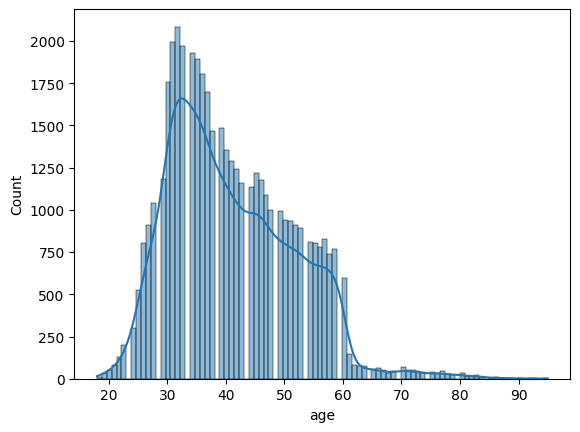

In [43]:
# distribution of age
sns.histplot(x = bank_marketing['age'],kde = True)

<Axes: xlabel='balance', ylabel='Count'>

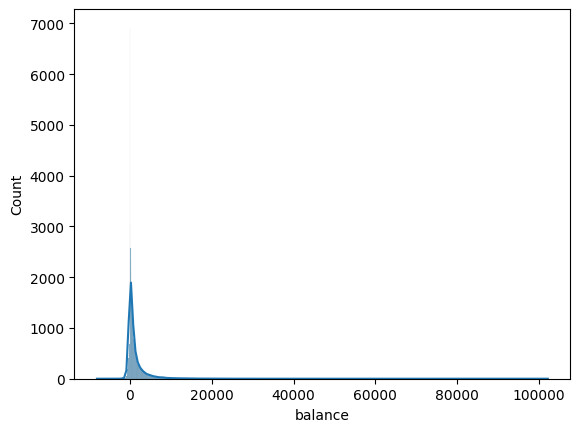

In [ ]:
# distribution of balance
sns.histplot(x = bank_marketing['balance'],kde = True)

<Axes: xlabel='day', ylabel='Count'>

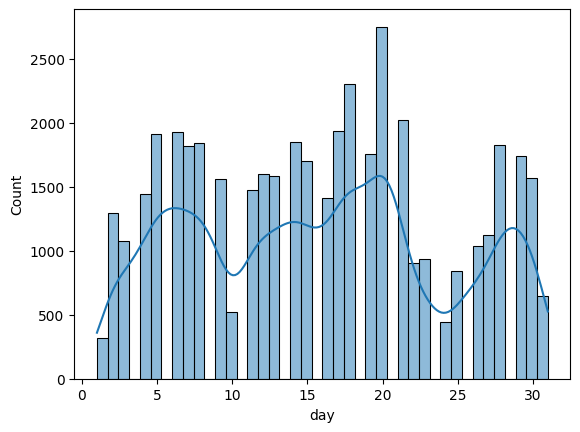

In [44]:
# distribution of day
sns.histplot(x = bank_marketing['day'],kde = True)

<Axes: xlabel='duration', ylabel='Count'>

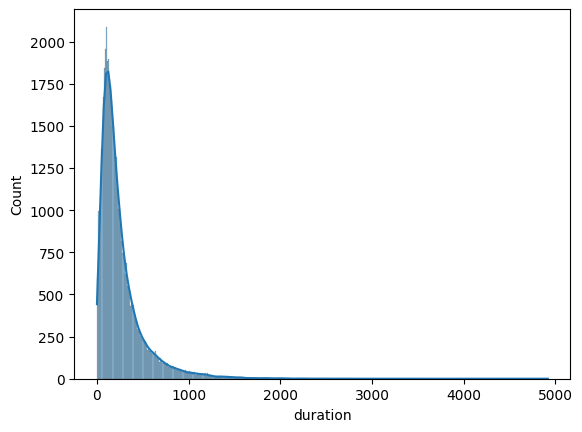

In [45]:
# distribution of duration
sns.histplot(x = bank_marketing['duration'],kde = True)

<Axes: xlabel='campaign', ylabel='Count'>

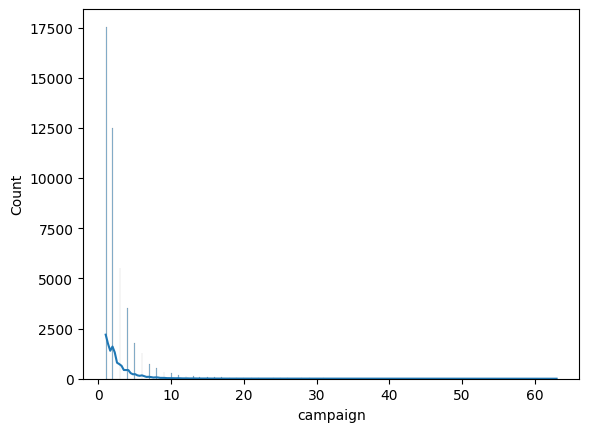

In [46]:
# distribution of campaign
sns.histplot(x = bank_marketing['campaign'],kde = True)

<Axes: xlabel='pdays', ylabel='Count'>

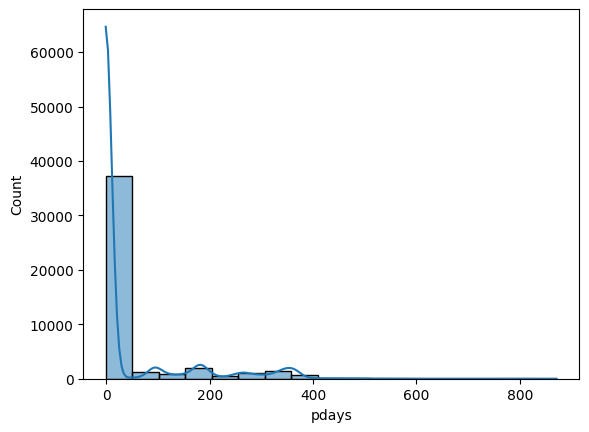

In [47]:
# distribution of pdays
sns.histplot(x = bank_marketing['pdays'],kde = True)

<Axes: xlabel='previous', ylabel='Count'>

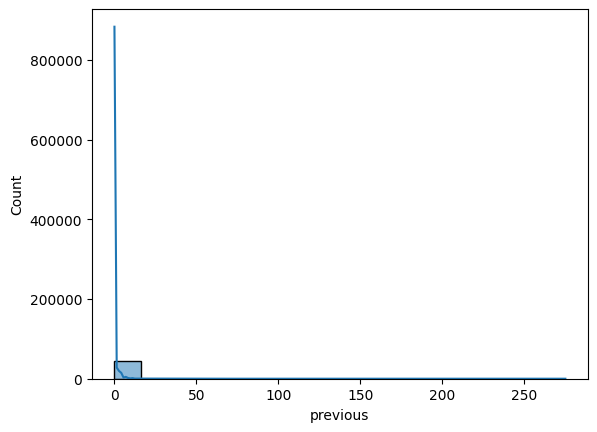

In [48]:
# distribution of previous
sns.histplot(x = bank_marketing['previous'],kde = True)

<Axes: >

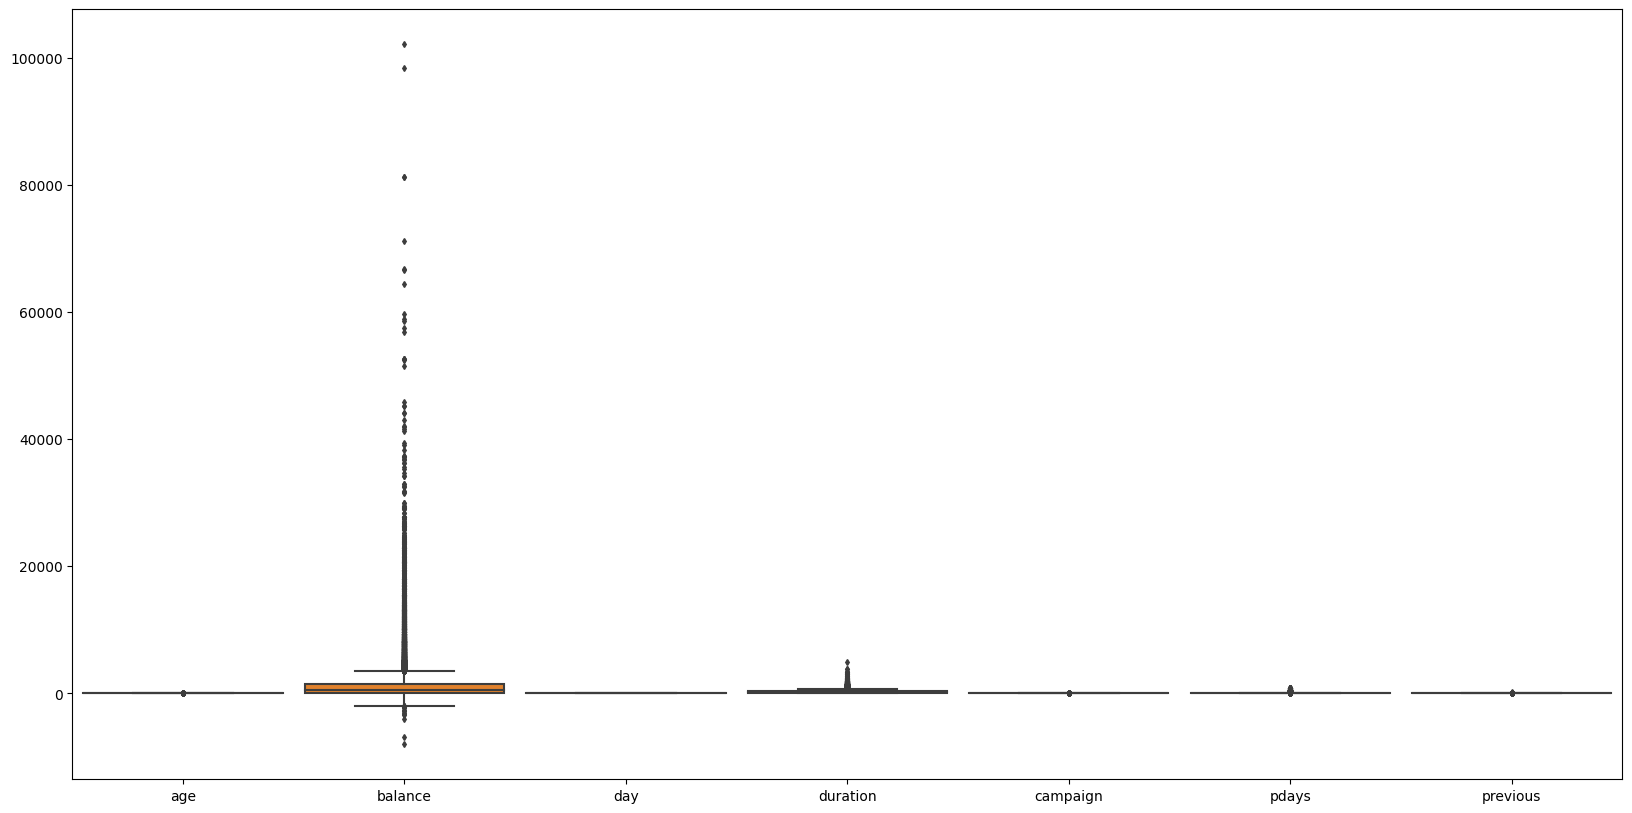

In [49]:
fig,ax = plt.subplots(figsize = (20,10))
sns.boxplot(data = bank_marketing,width = 0.9,fliersize = 3)

# Checking zeros in the dataset columnwise

In [50]:
# Sum of counts of zeros for each column
zeros_sum = (bank_marketing == 0).sum()

print(zeros_sum)

age              0
job              0
marital          0
education        0
default          0
balance       3514
housing          0
loan             0
contact          0
day              0
month            0
duration         3
campaign         0
pdays            0
previous     36954
poutcome         0
y                0
dtype: int64


# Selecting Indepenent variables

In [51]:
X = bank_marketing[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


# Performing Dummy Encoding for Categorical data columns for the Indepenent variables

In [52]:
X = pd.get_dummies(X,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Performing StandardScaling

In [53]:
columns_to_scale = ['age','balance','day','duration','campaign','pdays','previous']
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [54]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Selecting Target Variable

In [55]:
y = bank_marketing[['y']]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


# Performing Dummy Encoding for Categorical data columns for the Target variable

In [56]:
y = pd.get_dummies(y,columns=['y'])
y

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,0,1
45207,0,1
45208,0,1
45209,1,0


# Split the dataset into X_train, X_test, y_train, y_test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [58]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
33362,-0.182341,0.823628,0.503892,-0.722893,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28229,-0.935732,-0.095007,1.585313,-0.684062,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37952,-0.464863,-0.156425,-0.217055,0.403211,1.044601,-0.411453,-0.251940,1,0,0,...,0,0,1,0,0,0,0,0,0,1
43408,-2.065820,-0.318016,-1.298476,0.267302,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9897,0.382703,-0.447419,-0.817845,-0.614166,-0.569351,-0.411453,-0.251940,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,-0.559037,-0.120625,-1.298476,-0.851036,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21243,-0.559037,-0.201092,0.263576,-0.097711,2.981343,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42613,-0.559037,-0.341334,-0.577529,0.011016,-0.246560,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43567,2.737053,-0.245103,1.344997,-0.423893,-0.246560,1.416214,0.182198,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
X_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14001,-0.370689,0.013377,-0.697687,-0.649114,3.949713,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32046,-0.464863,-0.530514,-0.217055,3.164108,-0.569351,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13318,0.571051,-0.580764,-0.938003,-0.058880,0.721811,-0.411453,-0.251940,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42991,1.512791,-0.282873,-0.577529,-0.594750,1.367391,1.476138,0.616335,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14237,-0.747384,-0.580764,-0.217055,0.286718,-0.246560,-0.411453,-0.251940,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,-0.370689,0.837751,-0.817845,-0.707361,-0.246560,-0.411453,-0.251940,1,0,0,...,1,0,0,0,0,0,0,0,0,1
37898,-0.464863,-0.535112,-0.217055,-0.618049,1.367391,3.114047,0.182198,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1080,-0.370689,-0.447419,-1.058161,-0.567569,0.399020,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,0,0,0,1
17950,0.006007,-0.238534,1.705471,-0.691828,-0.246560,-0.411453,-0.251940,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y_train

,y_no,y_yes
33362,1,0
28229,1,0
37952,1,0
43408,0,1
9897,1,0
...,...,...
30403,1,0
21243,1,0
42613,0,1
43567,1,0


In [61]:
y_test

,y_no,y_yes
14001,1,0
32046,0,1
13318,1,0
42991,1,0
14237,1,0
...,...,...
9953,1,0
37898,1,0
1080,1,0
17950,1,0


# Model:DecisionTreeClassifier

In [62]:
# Initialize your model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
DecisionTreeClassifier_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')

# Calculate testing accuracy
DecisionTreeClassifier_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}')

# printing the  training data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

# printing the  testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.8694151995045563

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29944
           1       1.00      1.00      1.00      3964

   micro avg       1.00      1.00      1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908
 samples avg       1.00      1.00      1.00     33908


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9978
           1       0.45      0.49      0.47      1325

   micro avg       0.87      0.87      0.87     11303
   macro avg       0.69      0.70      0.70     11303
weighted avg       0.87      0.87      0.87     11303
 samples avg       0.87      0.87      0.87     11303



In [63]:
# Print the results
print("DecisionTreeClassifier:")
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}\n')

DecisionTreeClassifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8694151995045563

